In [3]:
import pandas as pd

# Завантаження датасету
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/mushroom_cleaned.csv'
df = pd.read_csv(file_path)

# Виведення перших 5 рядків
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0          1372          2                2          10     3.807467   
1          1461          2                2          10     3.807467   
2          1371          2                2          10     3.612496   
3          1261          6                2          10     3.787572   
4          1305          6                2          10     3.711971   

   stem-width  stem-color    season  class  
0        1545          11  1.804273      1  
1        1557          11  1.804273      1  
2        1566          11  1.804273      1  
3        1566          11  1.804273      1  
4        1464          11  0.943195      1  


In [4]:
# Розмір датасету
print(f"Розмір датасету: {df.shape}")

# Наявність пропущених даних
print("Пропущені дані:\n", df.isnull().sum())

# Типи даних
print("Типи даних:\n", df.dtypes)


Розмір датасету: (54035, 9)
Пропущені дані:
 cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64
Типи даних:
 cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object


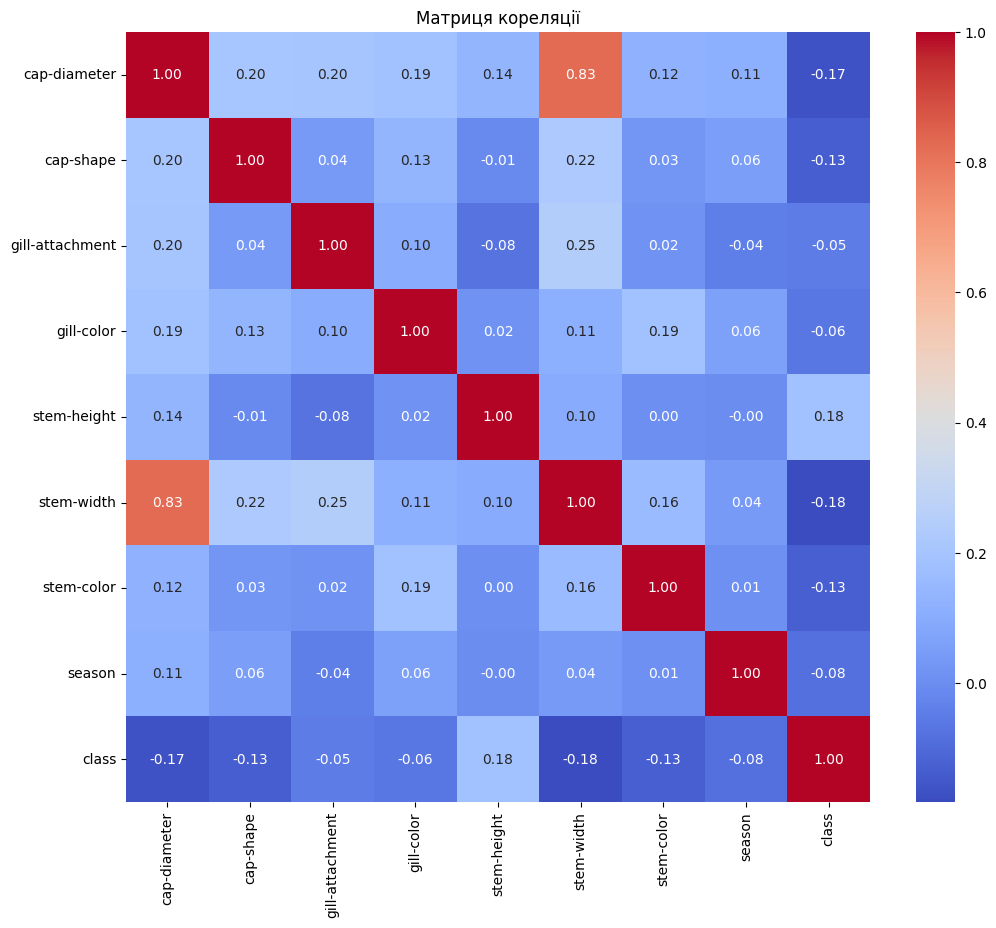

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Виведення матриці кореляції
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Матриця кореляції')
plt.show()


In [6]:
# Припустимо, що 'class' є цільовою функцією
correlation_with_target = correlation_matrix['class'].sort_values(ascending=False)
print("Кореляція з цільовою функцією:\n", correlation_with_target)


Кореляція з цільовою функцією:
 class              1.000000
stem-height        0.183354
gill-attachment   -0.052541
gill-color        -0.063947
season            -0.082919
stem-color        -0.128339
cap-shape         -0.133338
cap-diameter      -0.165676
stem-width        -0.182856
Name: class, dtype: float64


2

In [7]:
# Розподіл даних на ознаки та цільову змінну
X = df.drop('class', axis=1)
y = df['class']


In [8]:
# Кодування категоріальних змінних
X_encoded = pd.get_dummies(X, drop_first=True)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Модель випадкового лісу
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Модель логістичної регресії
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Оцінка моделей
y_pred_rf = rf_model.predict(X_test)
y_pred_logreg = logreg_model.predict(X_test)

# Метрики для моделі випадкового лісу
print("Випадковий ліс:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Метрики для логістичної регресії
print("Логістична регресія:")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


Випадковий ліс:
[[4855   54]
 [  38 5860]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807

Логістична регресія:
[[2642 2267]
 [1661 4237]]
              precision    recall  f1-score   support

           0       0.61      0.54      0.57      4909
           1       0.65      0.72      0.68      5898

    accuracy                           0.64     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.63      0.64      0.63     10807



3

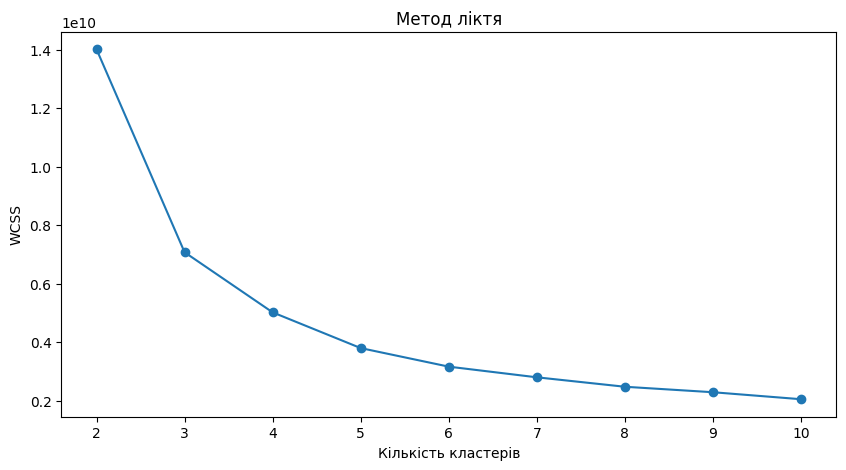

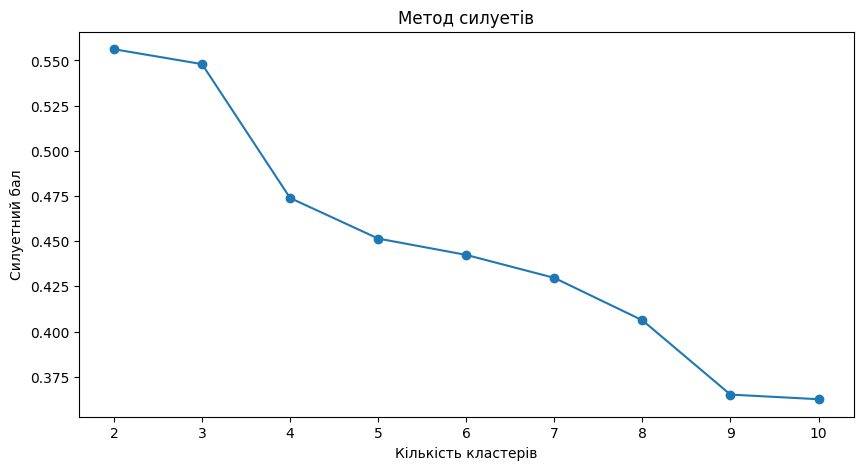

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Параметри для методу ліктя
wcss = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_encoded)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_encoded, kmeans.labels_))

# Графік для методу ліктя
plt.figure(figsize=(10, 5))
plt.plot(k_values, wcss, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.show()

# Графік для методу силуетів
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силуетний бал')
plt.show()


4

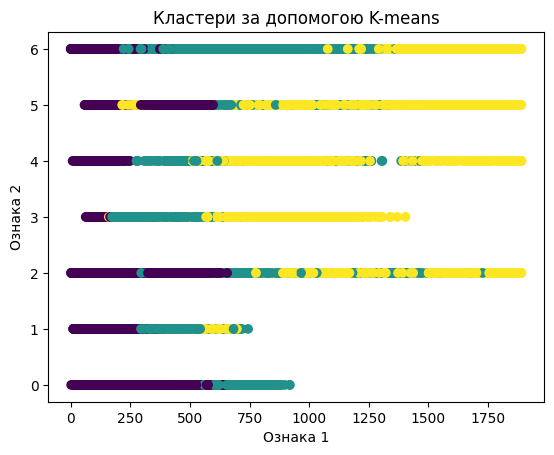

In [12]:
# K-means
optimal_k = 3  # Вибрано на основі методів ліктя та силуетів
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_encoded)

# Візуалізація
plt.scatter(X_encoded.iloc[:, 0], X_encoded.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('Кластери за допомогою K-means')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.show()


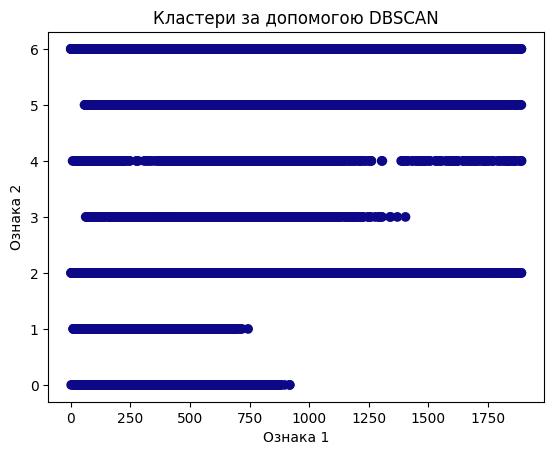

In [20]:
from sklearn.cluster import DBSCAN

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_encoded)

# Візуалізація
plt.scatter(X_encoded.iloc[:, 0], X_encoded.iloc[:, 1], c=dbscan_clusters, cmap='plasma')
plt.title('Кластери за допомогою DBSCAN')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.show()


Висновок: У лабораторній роботі була проведена кластеризація грибообразного датасету за допомогою DBSCAN.Використання DBSCAN показало його корисність у кластеризації даних різної форми та розміру.